### EDA de los datasets limpios y elección de variables previas al Sistema de Recomendación

En este notebook realizamos un Análisis Exploratorio a los dataframes ya limpios, buscamos relaciones, outliers, tendencias o patrones. Luego procedemos a elegir las variables con las que armaremos un dataframe que se utilizará específicamente en el endpoint de Sistema de Recomendación

 <h2 align=center> ______________________________________________________________________<h2>

#### Importamos las ibrerias a utilizar

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import Tools as t

In [8]:
games = pd.read_csv('data_ok/games_cleaned.csv', encoding='utf-8')
items = pd.read_csv('data_ok/users_items_cleaned.csv', encoding='utf-8')
reviews = pd.read_csv('data_ok/users_reviews_cleaned.csv', encoding='utf-8')

 <h2 align=center> ______________________________________________________________________<h2>

#### EDA del dataframe games

Damos una primera vista a los dataframes

In [3]:
games.head()

,genres,app_name,item_id,developer,released_year
0,Action,Lost Summoner Kitty,761140.0,Kotoshiro,2018
1,Casual,Lost Summoner Kitty,761140.0,Kotoshiro,2018
2,Indie,Lost Summoner Kitty,761140.0,Kotoshiro,2018
3,Simulation,Lost Summoner Kitty,761140.0,Kotoshiro,2018
4,Strategy,Lost Summoner Kitty,761140.0,Kotoshiro,2018


Revisamos la cantidad y tipo de dato de cada columna 

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71358 entries, 0 to 71357
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         71204 non-null  object 
 1   app_name       71358 non-null  object 
 2   item_id        71356 non-null  float64
 3   developer      71358 non-null  object 
 4   released_year  71358 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ MB


Modificamos el tipo de dato

In [5]:
games['genres'] = games['genres'].astype(str)
games['app_name'] = games['app_name'].astype(str)
games['developer'] = games['developer'].astype(str)


Revisamos la cantidad de nulos

In [6]:
nulos = t.PorcentajeNulos(games)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
genres,0.0,0,71358,71358
app_name,0.0,0,71358,71358
item_id,0.0,2,71356,71358
developer,0.0,0,71358,71358
released_year,0.0,0,71358,71358


 Se observa que hay 0.22% de nulos en la columna de genres, igualmente item_id hay 2 elementos vacíos por lo que procedemos a descartarlos.

In [7]:
games = games.dropna()

Procedemos a análizar los géneros de los juegos más jugados con un Pareto (usamos la función "Pareto" que se encuentra en el archivo Tools.py)

g:\My Drive\2. Data Science Henry\PI_STEAM\Tools.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x=dato_analizar, y='count', ax=ax, palette='coolwarm_r')                            # Graficamos el barplot de la categoria


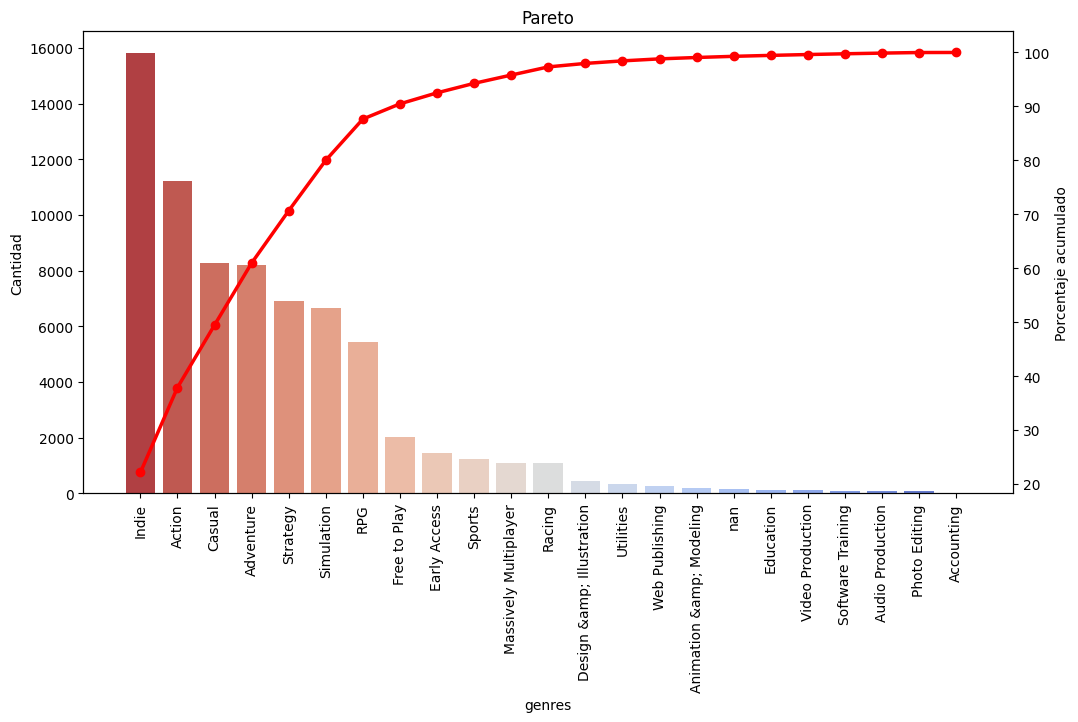

In [8]:
pareto = t.Pareto(games,'genres')

Del gráfico observamos varias cosas: hay géneros que realmente no son géneros como Free to Play, Early Access, Massively Multiplayer por lo que esas categrias procederemos a eliminarlas

In [9]:
eliminar = ['Early Access', 'Free to Play', 'Massively Multiplayer']
games = games[~games['genres'].isin(eliminar)]                                                      # Usamos el ~ para seleccionar las filas que no cumplen con las condiciones


Graficamos nuevamente los géneros

g:\My Drive\2. Data Science Henry\PI_STEAM\Tools.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x=dato_analizar, y='count', ax=ax, palette='coolwarm_r')                            # Graficamos el barplot de la categoria


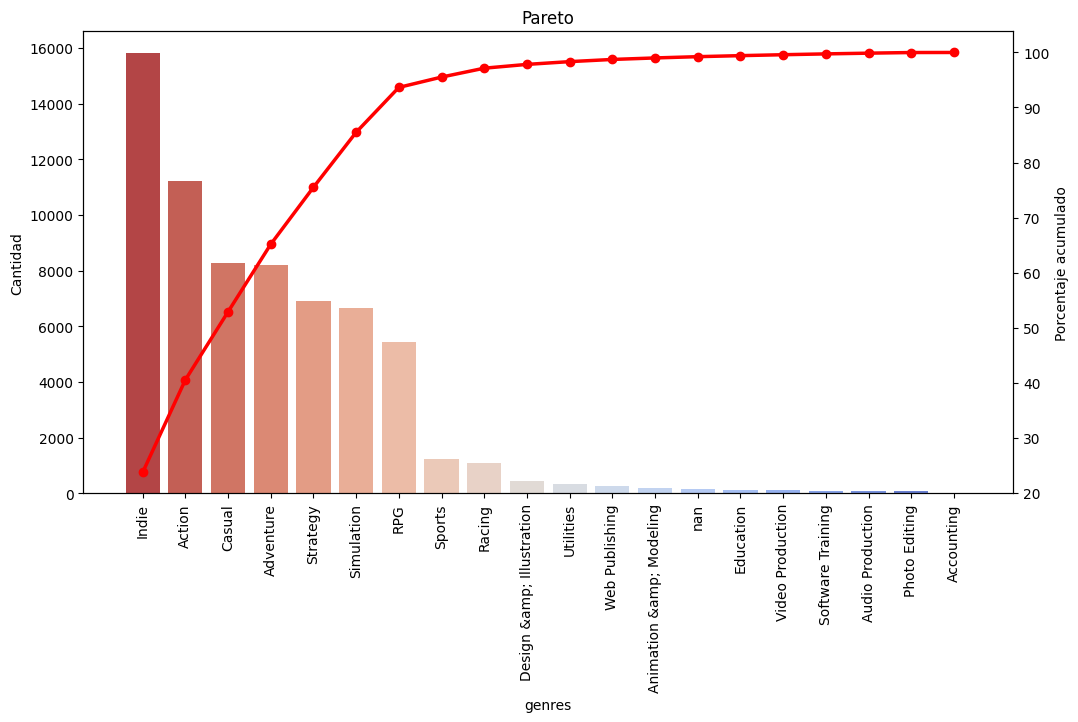

None


In [10]:
pareto =  t.Pareto(games,'genres')
print(pareto)

Podemos observar en el gráfico previo, que aprox el 85% de los géneros más jugados fueron: Indie, Action, Casual, Adventure, Strategy y Simulation, por lo que el 20% restante lo renombraremos como 'Otros' para facilitar el análisis posterior

In [11]:
condicion = ['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'RPG']

# Reemplazar los valores que no estén en la lista por 'Otros'
games.loc[~games['genres'].isin(condicion), 'genres'] = 'Otros'                                     # Agrupamos los géneros


Ahora, vamos a revisar los años de lanzamiento

Text(0.5, 0, 'Año de lanzamiento')

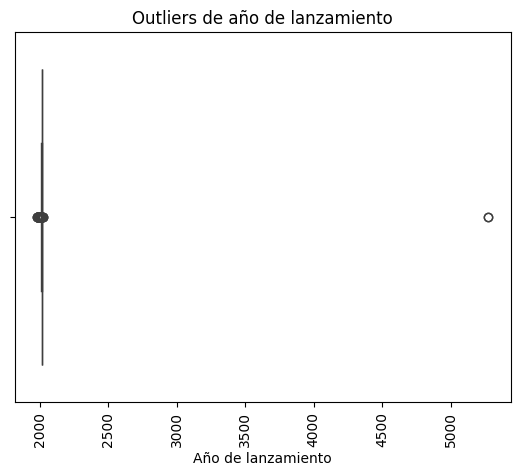

In [12]:
sns.boxplot(x = games['released_year'])                                                             # Hacemos un boxplot buscando outliers
plt.xticks(rotation=90)
plt.title(label='Outliers de año de lanzamiento')
plt.xlabel('Año de lanzamiento')

Observamos de entrada un outlier que de año aproximado de 5200, procedemos a buscarlo y eliminarlo

In [13]:
games = games.drop(games[games['released_year'] > 5000].index)

Repetimos el boxplot

Text(0.5, 0, 'Año de lanzamiento')

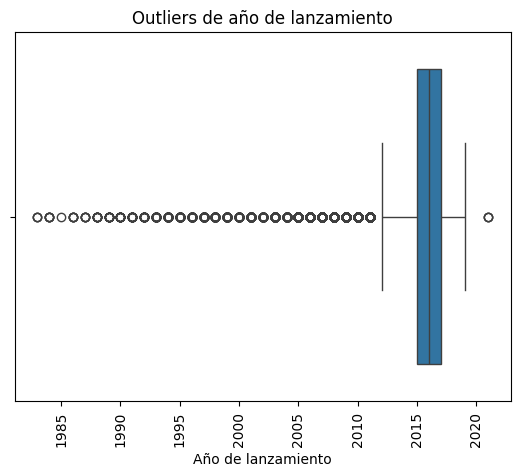

In [14]:
sns.boxplot(x = games['released_year'])
plt.xticks(rotation=90)
plt.title(label='Outliers de año de lanzamiento')
plt.xlabel('Año de lanzamiento')

A pesar que se obervan "outliers" en en el año de lanzamiento, esto es coherente ya que hay videojuegos que pueden haber sido lanzados de 1985 en adelante. Por lo que estos datos no se eliminarán. 

In [15]:
games.head(2)

,genres,app_name,item_id,developer,released_year
0,Action,Lost Summoner Kitty,761140.0,Kotoshiro,2018
1,Casual,Lost Summoner Kitty,761140.0,Kotoshiro,2018


 <h2 align=center> ______________________________________________________________________<h2>

#### EDA del dataframes reviews

Damos una primera vista al dataframe

In [17]:
reviews.head(2)

,user_id,item_id,recommend,year_posted,score
0,76561197970982479,1250,1,2011,2
1,76561197970982479,22200,1,2011,2


Revisamos la cantidad y el tipo de dato de cada columna

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      59305 non-null  object
 1   item_id      59305 non-null  int64 
 2   recommend    59305 non-null  int64 
 3   year_posted  59305 non-null  int64 
 4   score        59305 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 2.3+ MB


Modificamos el tipo de dato

In [19]:
reviews['user_id'] = reviews['user_id'].astype(str)

Columna recomendaciones. Para visualizar la cantidad de usuarios que está recomendando videojuegos

C:\Users\salon\AppData\Local\Temp\ipykernel_18572\3491474134.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(nuevas_etiquetas)                                 # gca es get current access, establece a los ejes actuales para poderlos modificar


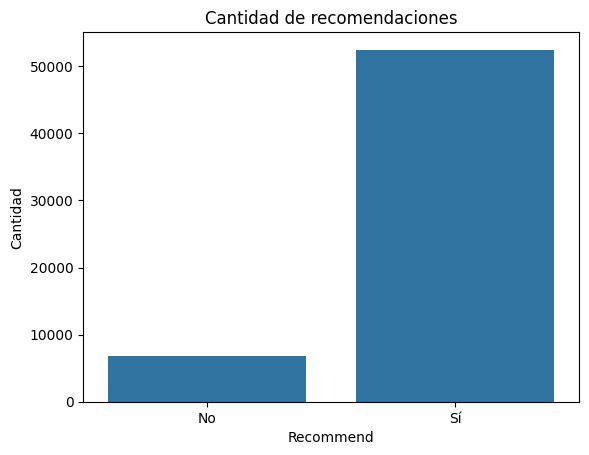

In [20]:
sns.countplot(data = reviews, x = 'recommend')                              # Hacemos un countplot de recommend
plt.xlabel('Recommend')
plt.ylabel('Cantidad')
plt.title('Cantidad de recomendaciones')
nuevas_etiquetas = ['No', 'Sí'] 
plt.gca().set_xticklabels(nuevas_etiquetas)                                 # gca es get current access, establece a los ejes actuales para poderlos modificar
plt.show()

Cantidad de juegos que se recomiendan (o no): donde 1 es sí se recomienda y 0 es no lo recomienda

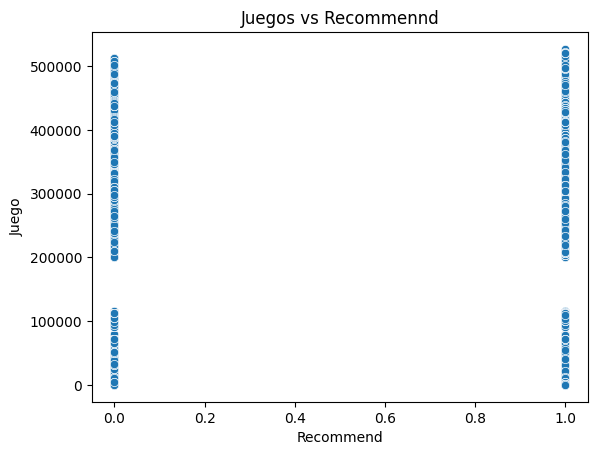

In [6]:
sns.scatterplot(data = reviews,  y = 'item_id', x = 'recommend')
plt.ylabel('Juego')
plt.xlabel('Recommend')
plt.title('Juegos vs Recommennd')
plt.show()

Distribución de calificaciones

C:\Users\salon\AppData\Local\Temp\ipykernel_18572\737850804.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(nuevas_etiquetas)                                 # gca es get current access, establece a los ejes actuales para poderlos modificar


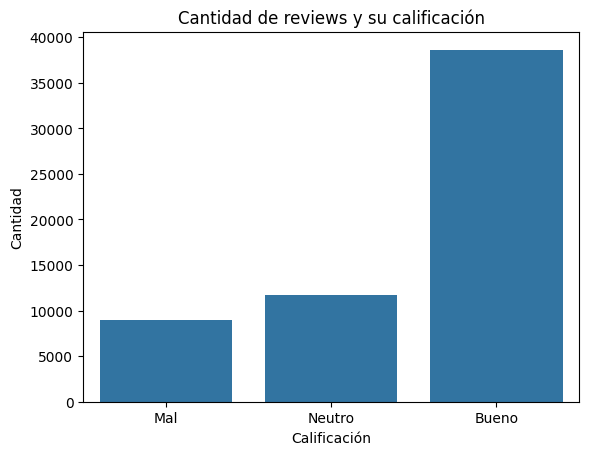

In [22]:
sns.countplot(data = reviews, x = 'score')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.title('Cantidad de reviews y su calificación')
nuevas_etiquetas = ['Mal', 'Neutro', 'Bueno'] 
plt.gca().set_xticklabels(nuevas_etiquetas)                                 # gca es get current access, establece a los ejes actuales para poderlos modificar
plt.show()

Buscamos outliers en la columna year_posted

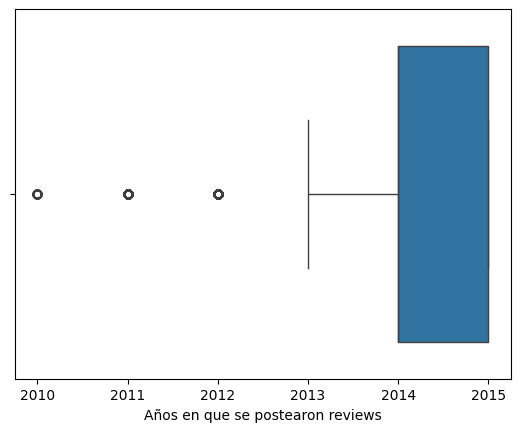

In [23]:
sns.boxplot(x = reviews['year_posted'])
plt.xlabel('Años en que se postearon reviews')
plt.show()

Podemos observar que existen algunos años que parecieran ser outliers, sin embargo la plataforma STEAM existe desde el 2003, por lo que no lo consideraremos como tal.

Verificamos cantidad de reviews

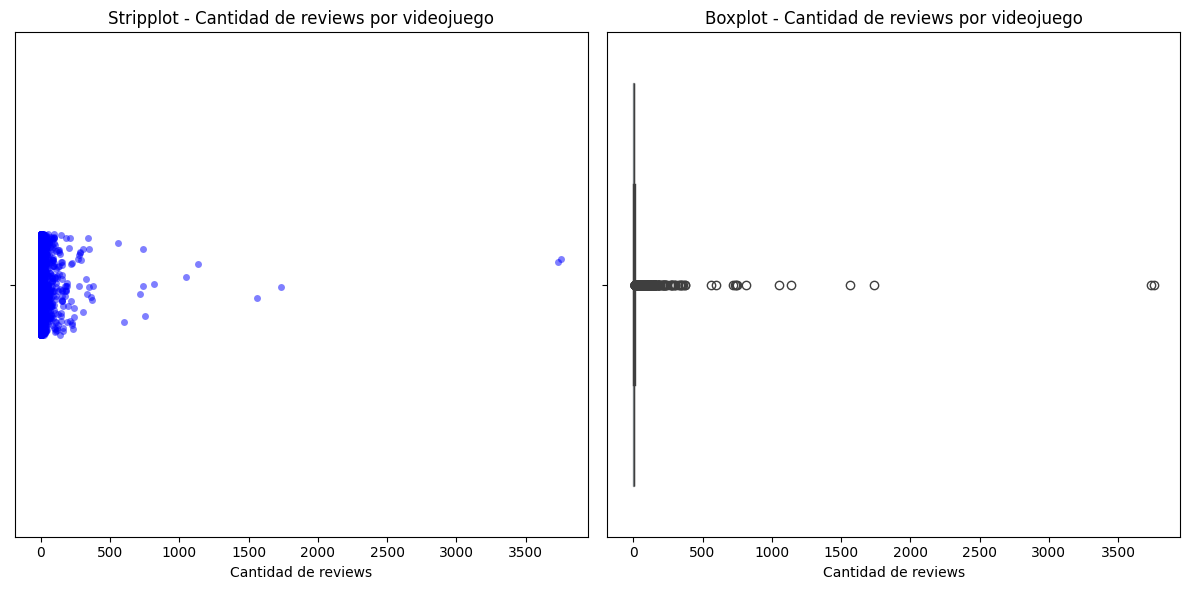

In [150]:
df_reviews = reviews.groupby('item_id')['score'].count().reset_index()                          # Sacamos la suma del score de cada videojuego

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))                                           # Crear una figura y ejes compartidos

sns.stripplot(data=df_reviews, x='score', ax=ax1, color='blue', alpha=0.5)                      # stripplot
ax1.set_xlabel('Cantidad de reviews')
ax1.set_title('Stripplot - Cantidad de reviews por videojuego')                       
sns.boxplot(data=df_reviews, x='score', ax=ax2, boxprops=dict(alpha=0.5))                       # boxplot
ax2.set_xlabel('Cantidad de reviews')
ax2.set_title('Boxplot - Cantidad de reviews por videojuego')

plt.tight_layout()
plt.show()

 <h2 align=center> ______________________________________________________________________<h2>

#### EDA del dataframe items

Damos una primera vista al dataframe

In [24]:
items.head(2)

,item_id,item_name,playtime_forever,user_id,items_count,steam_id
0,10,Counter-Strike,6.0,76561197970982479,277,76561197970982479
1,20,Team Fortress Classic,0.0,76561197970982479,277,76561197970982479


Revisamos la cantidad y el tipo de dato de cada columna

In [25]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           int64  
 1   item_name         object 
 2   playtime_forever  float64
 3   user_id           object 
 4   items_count       int64  
 5   steam_id          int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 235.9+ MB


Modificamos el tipo de dato

In [26]:
items['item_name'] = items['item_name'].astype(str)
items['user_id'] = items['user_id'].astype(str)
items['item_name'] = items['item_name'].astype(str)

Verificamos outliers en playtime forever

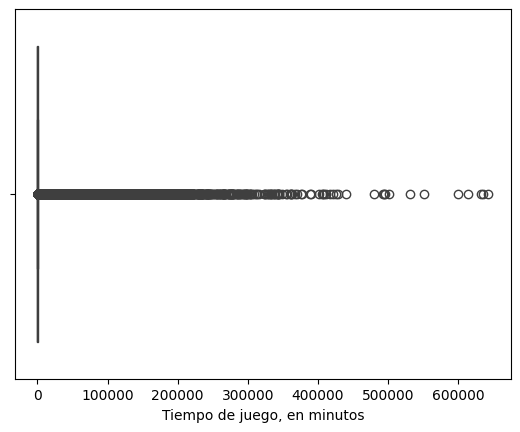

In [29]:
sns.boxplot(x = items['playtime_forever'])                                              # Cuantas horas han jugado desde que comenzaron
plt.xlabel('Tiempo de juego, en horas')
plt.show()

Playtime_forever se encuentra registrada en minutos por lo que no lo consideraremos como outlier

Revisamos el top 50 usuarios que más han jugado

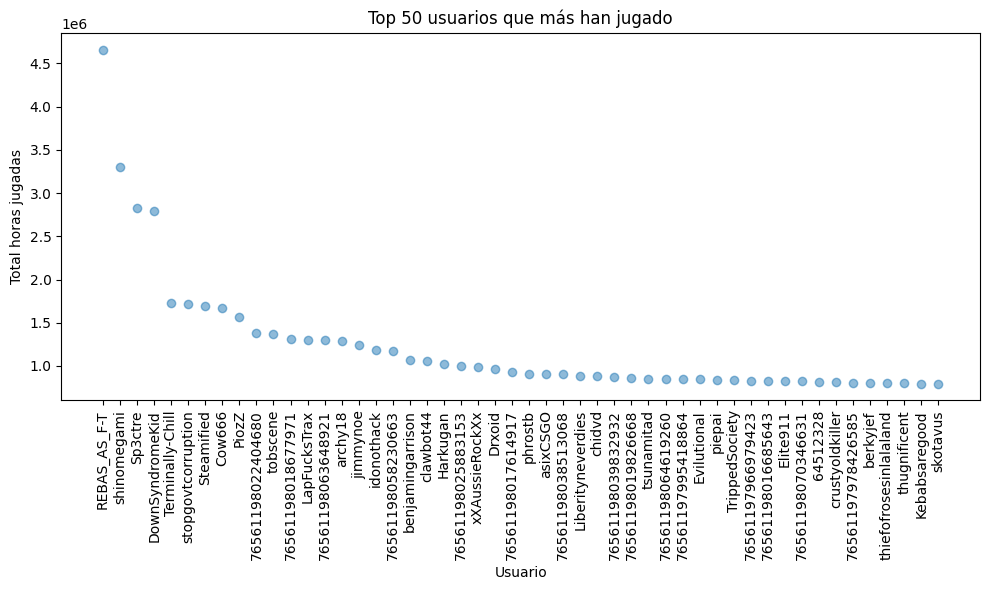

In [30]:
df_sum = items.groupby('user_id')['playtime_forever'].sum().reset_index()                       # Agrupamos por user_id y  suma el tiempo de juego
df_sorted = df_sum.sort_values(by='playtime_forever', ascending=False).head(50)                 # Acomodamos los valores de mayor a menor 

plt.figure(figsize=(10, 6))                                                                     
plt.scatter(df_sorted['user_id'], df_sorted['playtime_forever'], alpha=0.5)                     # Creamos la gráfica de dispersión
plt.xlabel('Usuario')
plt.ylabel('Total horas jugadas')
plt.title('Top 50 usuarios que más han jugado')
plt.xticks(rotation=90)                                                                         # Rotamos etiquetas del eje x para una mejor visualización
plt.tight_layout()                                                                              # Se ajusta al tamaño
plt.show()


Y vemos a continuación el top 50 de usuarios que menos han jugado (descartamos los que tengan 0 minutos)

In [31]:
items2 = items[items['playtime_forever'] != 0]                                                      # Filtramos el dataframe, sólo datos mayores a 0

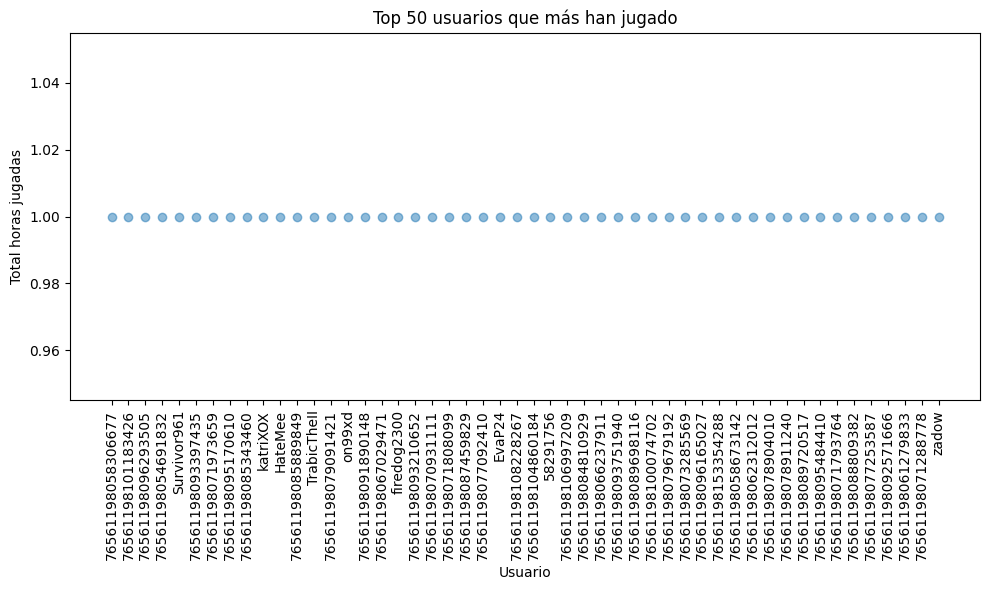

In [32]:
df_sum = items2.groupby('user_id')['playtime_forever'].sum().reset_index()                          # Agrupamos por user_id y  suma el tiempo de juego
df_sorted = df_sum.sort_values(by='playtime_forever', ascending=True).head(50)                      # Acomodamos los valores de mayor a menor 

plt.figure(figsize=(10, 6))
plt.scatter(df_sorted['user_id'], df_sorted['playtime_forever'], alpha=0.5)                         # Creamos la gráfica de dispersión
plt.xlabel('Usuario')
plt.ylabel('Total horas jugadas')
plt.title('Top 50 usuarios que más han jugado')
plt.xticks(rotation=90)                                                                             # Rotamos etiquetas del eje x para una mejor visualización
plt.tight_layout()                                                                                  # Se ajusta al tamaño
plt.show()

 <h2 align=center> ______________________________________________________________________<h2>

### Elección de las variables para el Sistema de Recomendación

En este apartado del proceso, eligiremos y prepararemos el dataframe con que trabajará el Sistema de Recomendación

Revisamos como están estructurado los dataframes a utilizar

In [9]:
reviews.head()

,user_id,item_id,recommend,year_posted,score
0,76561197970982479,1250,1,2011,2
1,76561197970982479,22200,1,2011,2
2,76561197970982479,43110,1,2011,2
3,js41637,251610,1,2014,2
4,js41637,227300,1,2013,2


In [10]:
games.head(2)

,genres,app_name,item_id,developer,released_year
0,Action,Lost Summoner Kitty,761140.0,Kotoshiro,2018
1,Casual,Lost Summoner Kitty,761140.0,Kotoshiro,2018


Al dataframe reviews, le anexamos la columna games.app_name, para complementar la información del titulo de los videojuegos

In [247]:
df = pd.merge(reviews,games[['item_id','app_name']], on = 'item_id', how = 'inner')             # Sólo los valores que tengan en común
df.head()

,user_id,item_id,recommend,year_posted,score,app_name
0,76561197970982479,1250,1,2011,2,Killing Floor
1,death-hunter,1250,1,2015,2,Killing Floor
2,DJKamBer,1250,1,2013,2,Killing Floor
3,diego9031,1250,1,2015,2,Killing Floor
4,76561198081962345,1250,1,2014,1,Killing Floor


Validamos nulos

In [248]:
nulos = t.PorcentajeNulos(df)
nulos

,%_valores_nulos,Cantidad_Nulos,Cantidad_NO_Nulos,Total_Registros
user_id,0.0,0,105527,105527
item_id,0.0,0,105527,105527
recommend,0.0,0,105527,105527
year_posted,0.0,0,105527,105527
score,0.0,0,105527,105527
app_name,0.0,0,105527,105527


Validamos el tipo de dato de cada columna

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105527 entries, 0 to 105526
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      105527 non-null  object
 1   item_id      105527 non-null  int64 
 2   recommend    105527 non-null  int64 
 3   year_posted  105527 non-null  int64 
 4   score        105527 non-null  int64 
 5   app_name     105527 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.8+ MB


Verificamos la cantidad de usuarios, reviews y videojuegos

In [251]:
print(f'El dataset reviews tiene {df['user_id'].nunique()} usuarios')
print(f'El dataset reviews tiene {df['item_id'].nunique()} videojuegos')
print(f'El dataset reviews tiene {df["score"].count()} reviews')


El dataset reviews tiene 23246 usuarios
El dataset reviews tiene 3067 videojuegos
El dataset reviews tiene 105527 reviews


Text(37.722222222222214, 0.5, 'Score')

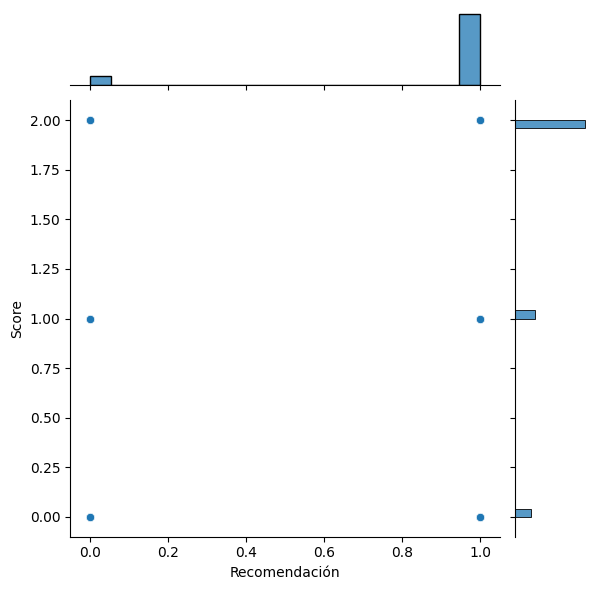

In [252]:
sns.jointplot(x='recommend', y='score', data=df)
plt.xlabel('Recomendación')
plt.ylabel('Score')

Con los datos que tenemos decidimos unificar el criterio de puntuación (score) con las recomendaciones (si o no) de un usuario para ese juego en una columna que le llamaremos calificaciones

In [253]:
def ponderacion(row):
    '''
    Calcula una calificación basada en el análisis de sentimientos y la recomendación de review de juegos realizado por los usuarios.

    Parámetros:
    row (dict): Un diccionario que contiene las siguientes claves:
        - "sentiment_analysis" (int): La puntuación del análisis de sentimientos (0, 1 o 2).
        - "reviews_recommend" (int): Indica si las reseñas recomiendan ( 0 No se recomienda / 1 Si se recomienda)

    Devuelve:
        int: 0,1,2,3,4 o 5
        None: None si las entradas son inválidas.
        
    '''
    if (row["recommend"] == 0) and (row["score"] == 0):
                return 0
    elif (row["recommend"] == 0) and (row["score"] == 1):
                return 1
    elif (row["recommend"] == 0) and (row["score"] == 2):
                return 2
    elif (row["recommend"] == 1) and (row["score"] == 0):
                return 3
    elif (row["recommend"] == 1) and (row["score"] == 1):
                return 4
    elif (row["recommend"] == 1) and (row["score"] == 2):
                return 5
    return None


Aplicacmos de la función a nuestro dataframe para unificar reviews y score en una sola variable

In [254]:
df['calificaciones'] = df.apply(ponderacion, axis=1)
df

,user_id,item_id,recommend,year_posted,score,app_name,calificaciones
0,76561197970982479,1250,1,2011,2,Killing Floor,5
1,death-hunter,1250,1,2015,2,Killing Floor,5
2,DJKamBer,1250,1,2013,2,Killing Floor,5
3,diego9031,1250,1,2015,2,Killing Floor,5
4,76561198081962345,1250,1,2014,1,Killing Floor,4
...,...,...,...,...,...,...,...
105522,MeloncraftLP,262850,1,2014,2,The Journey Down: Chapter Two,5
105523,vinquility,431510,1,2014,0,Mystic Destinies: Serendipity of Aeons,3
105524,vinquility,431510,1,2014,0,Mystic Destinies: Serendipity of Aeons,3
105525,vinquility,431510,1,2014,0,Mystic Destinies: Serendipity of Aeons,3


Visualizamos cómo quedó distribuida la nueva ponderación

<Axes: xlabel='calificaciones', ylabel='count'>

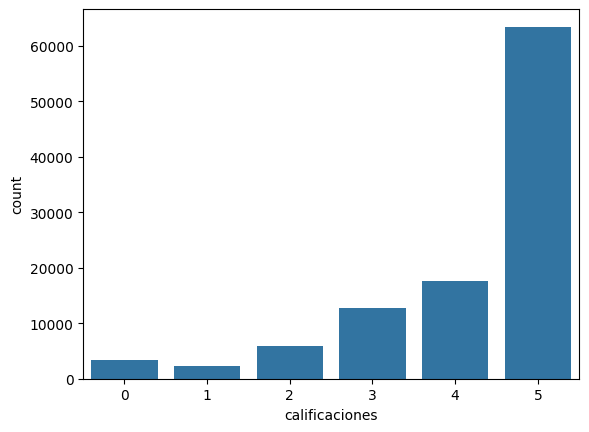

In [255]:
sns.countplot(data = df, x = 'calificaciones')

Eliminamos las columnas item_id, year_posted, score y recommend, ya que no son más necesarias para el Sistema de Recomendación

In [256]:
eliminar = ['item_id','recommend', 'score', 'year_posted']
df1 = df.drop(columns= eliminar)
df1.head(2)

,user_id,app_name,calificaciones
0,76561197970982479,Killing Floor,5
1,death-hunter,Killing Floor,5


Guardamos el df en un archivo csv para utilizarlo en el siguiente paso del Sistema Recomendación

In [262]:
df1.to_csv('df_recomendacion.csv', index = False, encoding='utf-8')

Este es el fin de esta parte del proceso, porfavor da click [aqui](03_dfAuxiliares.ipynb) para continuar.